# SWMAL Exercise

## Pipelines

We now try building af ML pipeline. The data for this exercise is the same as in L01, meaning that the OECD data from the 'intro.ipynb' have been save into a Python 'pickle' file. 

The pickle library is a nifty data preservation method in Python, and from L01 the tuple `(X, y)` have been stored to the pickle file `tmal_l01_data.pkl', try reloading it..

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(y)

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

[6.  5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6.  5.9 7.4 7.3 6.5 6.9 7.
 7.4 7.3 7.3 6.9 6.8 7.2 7.5 7.3 7.  7.5 7.2]
X.shape=(29, 1),  y.shape=(29,)
OK


###  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
MLP    .score(X, y)=-620173331651912251838824448.00

OK


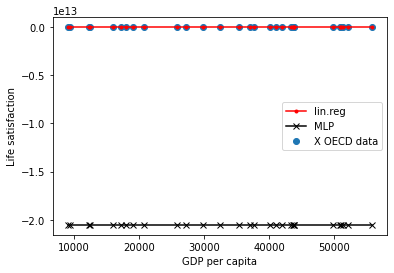

In [2]:
# Setup the MLP and lin. regression again..

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2
    
    def Fill(s, n):
        while(len(s)<n):
            s += " "
        return s

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{Fill(name_model1,l)}.score(X, y)={score_model1:0.2f}")
    print(f"{Fill(name_model2,l)}.score(X, y)={score_model2:0.2f}")


# lets make a linear and MLP regressor and redo the plots

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='sgd',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y)
plt.savefig('./images/1.png', format='png', dpi=300)
print("\nOK")

### Qa) Create a Min/max scaler for the MLP

Now, the neurons in neural networks normally expect input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range then the neuron will saturate to its min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. Af fix to the problem in Qd), from `intro.ipynb`, is to preprocess data by scaling it down to something more sensible.

Try to manually scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

(If you already made exercise "Qe) Neural Network with pre-scaling" in L01, then reuse Your work here!) 

[9054.914]
[55805.204]
lin.reg.score(X, y)=0.73
MLP    .score(X, y)=-0.35

OK


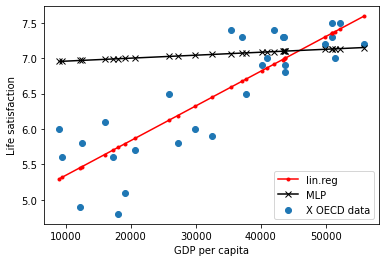

In [15]:
# TODO: add your code here.. s109 top, how to make min-max scaling
#Min_max_Calc(val) = (val-min_val)/(max_val-min_val) Waow!
def Fill(s, n):
        while(len(s)<n):
            s += " "
        return s

def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2

def minmaxscaler(Xvar):
    minVal = min(Xvar)
    maxVal = max(Xvar)
    minmaxedarray = []
    print(minVal)
    print(maxVal)
    for i in Xvar:
        minmaxedarray.append((i-2*minVal)/(6*maxVal-minVal))
    
    return np.array(minmaxedarray)

minmaxedX = minmaxscaler(X)

mlp.fit(minmaxedX,y)
linreg.fit(minmaxedX, y)

#PlotModels(linreg, mlp, minmaxedX, y)
y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(linreg, mlp, minmaxedX, y)
plt.plot(X, y_pred_model1, "r.-")
plt.plot(X, y_pred_model2, "kx-")
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend(["lin.reg", "MLP", "X OECD data"])
l = max(len("lin.reg"), len("MLP"))

print(f"""{Fill("lin.reg",l)}.score(X, y)={score_model1:0.2f}""")
print(f"""{Fill("MLP",l)}.score(X, y)={score_model2:0.2f}""")



plt.savefig('./images/Qa_plot_sgd.png', format='png', dpi=300)
print("\nOK")



#assert False, "TODO: rescale X and refit the model(s).."

### Qb) Scikit-learn Pipelines

Now, rescale again, but use the `sklearn.preprocessing.MinMaxScaler`.

When this works put both the MLP and the scaler into a composite construction via `sklearn.pipeline.Pipeline`. This composite is just a new Scikit-learn estimator, and can be used just like any other `fit-predict` models, try it, and document it for the journal.

(You could reuse the `PlotModels()` function by also retraining the linear regressor on the scaled data, or just write your own plot code.)


OK
lin.reg.score(X, y)=0.73
MLP    .score(X, y)=-0.24

OK


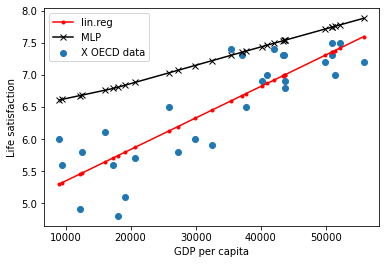

In [13]:
# TODO: add your code here..
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

def Fill(s, n):
        while(len(s)<n):
            s += " "
        return s

def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2



scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

mlp.fit(X_scaled,y)
linreg.fit(X_scaled, y)

#PlotModels(linreg, mlp, X_scaled, y)
#plt.savefig('./images/Qb_plot.png', format='png', dpi=300)
print("\nOK")

pipe = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('mlp',mlp)
    ]
)

pipe.fit(X,y)
linreg.fit(X, y)

#PlotModels(linreg, pipe, X, y)
y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(linreg, pipe, X, y)
plt.plot(X, y_pred_model1, "r.-")
plt.plot(X, y_pred_model2, "kx-")
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend(["lin.reg", "MLP", "X OECD data"])
l = max(len("lin.reg"), len("MLP"))

print(f"""{Fill("lin.reg",l)}.score(X, y)={score_model1:0.2f}""")
print(f"""{Fill("MLP",l)}.score(X, y)={score_model2:0.2f}""")
plt.savefig('./images/Qb_plot_sgd.png', format='png', dpi=300)
print("\nOK")

#assert False, "TODO: put everything into a pipeline.."

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Explain the fundamental problem with a min-max scaler and outliers. 

Will a `sklearn.preprocessing.StandardScaler` do better here, in the case of abnormal feature values/outliers?

In [5]:
# TODO: research the problem here.. s108-109
Problem: Hvis to attributters datasæt har meget forskellige værdi, f.eks datasæt1 range er [0:15] og datasæt2 range er [0:23000]
, så vil attribut 2 automatisk betyde mere. For at få begge attributter til at vægte samme, normaliser! Kan bruge min-max scaling
Men, problem! Hvis er outliers, kan forskyde alle værdier i datasæt, så normalisering ikke ændre på forhold! Standardisering bedre
håndtere dette. Men! bounder ikke værdier til bestemt scale, som kan give problemer for nogle neurale netværk.
# https://www.codecademy.com/article/normalization
assert False, "TODO: investigate outlier problems and try a StandardScaler.."

SyntaxError: invalid syntax (Temp/ipykernel_26668/1183057262.py, line 2)

### Qd) Modify the MLP Hyperparameters

Finally, try out some of the hyperparameters associated with the MLP.

Specifically, test how few neurons the MLP can do with---still producing a sensible output, i.e. high $R^2$. 

Also try-out some other activation functions, ala sigmoid, and solvers, like `sgd`.

Notice, that the Scikit-learn MLP does not have as many adjustable parameters, as a Keras MLP, for example, the Scikit-learn MLP misses neurons initialization parameters (p. 333-334 [HOML]) and the ELU activation function (p. 336 [HOML]).

OPTIONAL$_1$: use a Keras MLP regressor instead of the Scikit-learn MLP (You need to install the  Keras if its not installed as default).

OPTIONAL$_2$: try out the `early_stopping` hyperparameter on the `MLPRegressor`. 

OPTIONAL$_3$: try putting all score-calculations into K-fold cross-validation  methods readily available in Scikit-learn using

* `sklearn.model_selection.cross_val_predict`
* `sklearn.model_selection.cross_val_score` 

or similar (this is, in theory, the correct method, but can be hard to use due to the  extremely small number of data points, `n=29`).

In [ ]:
# TODO: add your code here..
assert False, "TODO: test out various hyperparameters for the MLP.."

REVISIONS||
---------||
2020-10-15| CEF, initial. 
2020-10-21| CEF, added Standard Scaler Q.
2020-11-17| CEF, removed orhpant text in Qa (moded to Qc).
2021-02-10| CEF, updated for ITMAL F21.
2021-11-08| CEF, updated print info.
2021-02.10| CEF, updated for SWMAL F22.
